<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Jan  7 16:29:27 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

* Quality Assurance / Quality Control
* Production
* Barcode analysis

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting can happen if the model is fitted too close to the training data after training, such that the model can not handle new data well.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Cross-Validation: Evaluate the model's ability to generalize on unseen data by generating multiple train/test splits to tune the model.
* Data Augmentation: Create new training models by combining existing examples.
* Noise: Add noise to the inputs during training.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

len(train_data), len(test_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 898kB/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.0kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.66MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

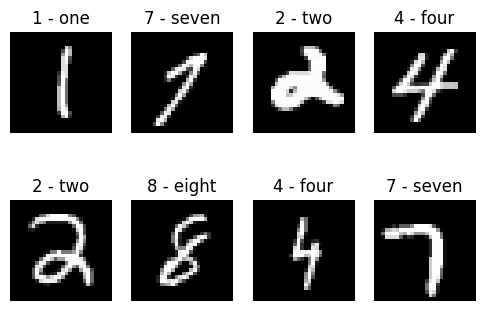

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
rows, cols = 2, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [32]:
from torch import nn

class MNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=10),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*9*9,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    #print(f"Output shape after conv_block_2: {x.shape}")
    x = self.classifier(x)
    return x

In [8]:
model_1_cpu = MNISTModelV1(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to("cpu")

model_1_gpu = MNISTModelV1(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [10]:
### Setup a loss function, accuracy function and optimizer
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1_cpu.parameters(),
                            lr=0.1)

In [11]:
### Timer to track how long it takes
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [12]:
### Create functions for training and testing
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """Performs a training step with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step() # model gets updated every batch instead of every epoch

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [13]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  """Performs a testing loop step on model going over data_loader."""

  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # to predict labels to labels

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Calculate the test loss average and test acc average per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [14]:
### Train on CPU
from tqdm.auto import tqdm

device = "cpu"
model_1_cpu.to(device)
print(f"Model is currently on: {next(model_1_cpu.parameters()).device}")

train_time_start_model_1 = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1_cpu,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1_cpu,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_1 = timer()
total_train_time_model_1_cpu = print_train_time(start=train_time_start_model_1, end=train_time_end_model_1, device=device)

Model is currently on: cpu


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.32237 | Train acc: 89.18%
Test loss: 0.06837 | Test acc: 97.83%

Epoch: 1
--------
Train loss: 0.07454 | Train acc: 97.69%
Test loss: 0.05816 | Test acc: 97.98%

Epoch: 2
--------
Train loss: 0.05719 | Train acc: 98.25%
Test loss: 0.05564 | Test acc: 98.03%

Epoch: 3
--------
Train loss: 0.05072 | Train acc: 98.43%
Test loss: 0.04820 | Test acc: 98.46%

Epoch: 4
--------
Train loss: 0.04416 | Train acc: 98.56%
Test loss: 0.04424 | Test acc: 98.55%

Train time on cpu: 356.170 seconds


In [15]:
### Train on GPU
from tqdm.auto import tqdm

### Setup a loss function, accuracy function and optimizer
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1_gpu.parameters(),
                            lr=0.1)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_1_gpu.to(device)
print(f"Model is currently on: {next(model_1_gpu.parameters()).device}")

train_time_start_model_1 = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1_gpu,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1_gpu,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_1 = timer()
total_train_time_model_1_gpu = print_train_time(start=train_time_start_model_1, end=train_time_end_model_1, device=device)

Model is currently on: cuda:0


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.30329 | Train acc: 89.69%
Test loss: 0.06962 | Test acc: 97.92%

Epoch: 1
--------
Train loss: 0.07381 | Train acc: 97.74%
Test loss: 0.05361 | Test acc: 98.19%

Epoch: 2
--------
Train loss: 0.05737 | Train acc: 98.24%
Test loss: 0.04912 | Test acc: 98.33%

Epoch: 3
--------
Train loss: 0.04733 | Train acc: 98.50%
Test loss: 0.04603 | Test acc: 98.46%

Epoch: 4
--------
Train loss: 0.04166 | Train acc: 98.72%
Test loss: 0.04066 | Test acc: 98.55%

Train time on cuda: 63.006 seconds


In [16]:
### Compare training times
total_train_time_model_1_cpu, total_train_time_model_1_gpu

(356.170081226, 63.00598008099996)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

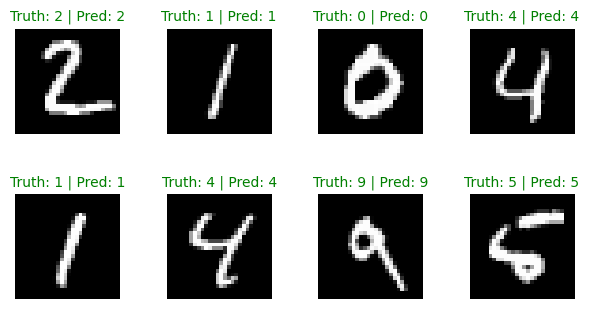

In [17]:
fig = plt.figure(figsize=(6, 4))
rows, cols = 2, 4
for i in range(1, rows*cols+1):
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_1_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  fig.add_subplot(rows, cols, i)
  fig.tight_layout()
  plt.imshow(img.squeeze(), cmap="gray")
  text = f"Truth: {label} | Pred: {model_pred_label.cpu().item()}"

  if model_pred_label == label:
    plt.title(text, fontsize=10, c="g") # green text if prediction is same as truth
  else:
    plt.title(text, fontsize=10, c="r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [18]:
### Make predictions with trained model
from tqdm.auto import tqdm

y_preds = []
model_1_gpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Make predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model_1_gpu(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Make predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [19]:
### import torchmetrics and mlxtend
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 39.9 MB/s eta 0:00:00
mlxtend version: 0.23.3


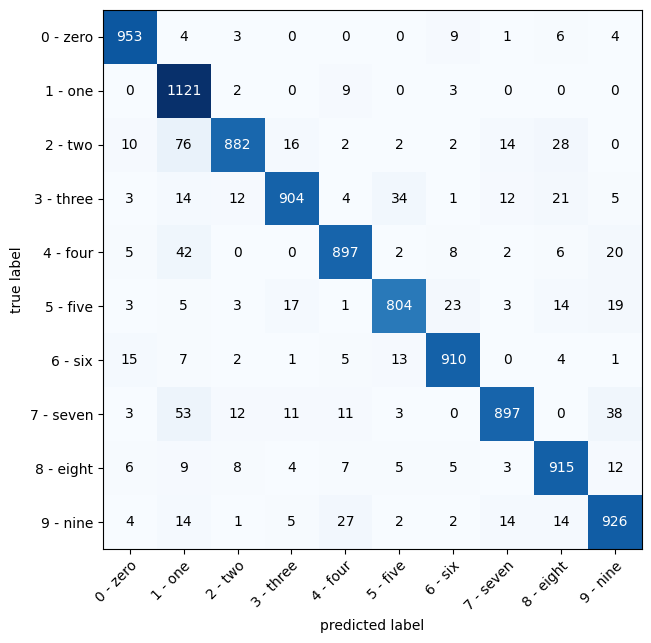

In [20]:
### Create confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [21]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [22]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=12,
                       stride=3,
                       padding=1)

random_tensor_conv_layer = conv_layer(random_tensor)
print(f"Tensor shape after passing through conv2d layer: {random_tensor_conv_layer.shape}")

Tensor shape after passing through conv2d layer: torch.Size([1, 64, 19, 19])


When the kernel_size parameter goes up, the output shape reduces, bc the kernel reaches the image border faster.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [23]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [24]:
### Get FashionMNIST dataset
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

len(train_data), len(test_data)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.25MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.01MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [25]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [26]:
### Prepare Dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7efae5d839d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7efae5d81de0>)

In [33]:
### new fashion model based on model from before
fashion_model = MNISTModelV1(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

fashion_model

MNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(10, 10))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=810, out_features=10, bias=True)
  )
)

In [34]:
### loss_fn, accuracy_fn and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashion_model.parameters(),
                            lr=0.1)

In [35]:
### Training and Testing
from tqdm.auto import tqdm

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=fashion_model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=fashion_model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.54538 | Train acc: 80.27%
Test loss: 0.38129 | Test acc: 86.43%

Epoch: 1
--------
Train loss: 0.34759 | Train acc: 87.48%
Test loss: 0.35423 | Test acc: 87.13%

Epoch: 2
--------
Train loss: 0.31159 | Train acc: 88.80%
Test loss: 0.33629 | Test acc: 87.58%

Epoch: 3
--------
Train loss: 0.29013 | Train acc: 89.63%
Test loss: 0.31519 | Test acc: 88.17%

Epoch: 4
--------
Train loss: 0.27572 | Train acc: 90.09%
Test loss: 0.28930 | Test acc: 89.46%



In [36]:
### Make predictions
test_preds = []
fashion_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    y_logit = fashion_model(X.to(device))
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    test_preds.append(y_pred)
test_preds = torch.cat(test_preds).cpu()
test_preds

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [37]:
### Get wrong predictions
import numpy as np
wrong_predictions = np.where(test_preds != test_data.targets)[0]
wrong_predictions

array([   4,   12,   17, ..., 9972, 9977, 9979])

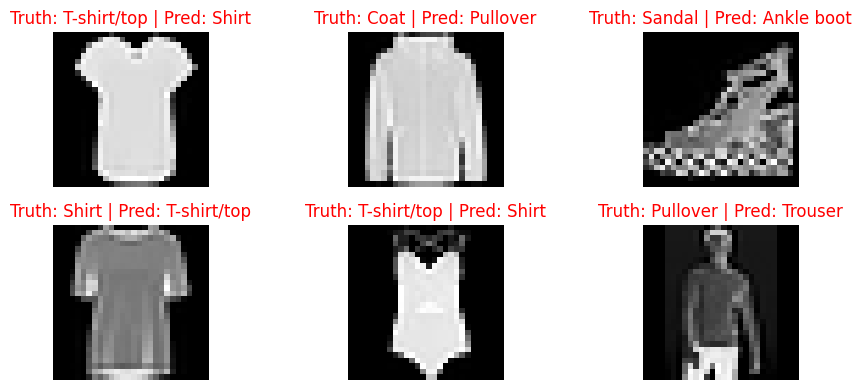

In [54]:
### Plot wrong predictions
import random
random_selection = random.sample(list(wrong_predictions), k=6)

fig = plt.figure(figsize=(12, 4))
rows, cols = 2 ,3

for i, idx in enumerate(random_selection):
  true_label = class_names[test_data[idx][1]]
  pred_label = class_names[test_preds[idx]]

  fig.add_subplot(rows, cols, i+1)
  plt.imshow(test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"Truth: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False)
  plt.tight_layout();

I think the labels of the data can be improved. For example, a shirt can also be seen as a t-shirt or a top. Personally, I don't quite see the difference between the two classes.